## Load Dataset (.json)

In [1]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox

import json
import matplotlib.pyplot as plt
import numpy as np

account_name = '2algerianstravel'

Using TensorFlow backend.


In [2]:
with open(f'../data/{account_name}.json', 'r') as json_fp:
    dataset_dict = json.load(json_fp)
    pass

for idx, item in enumerate(dataset_dict.items()):
    print(item)
    if idx == 3:
        break

('2algerianstravel_052_24038Likes.png', [[[213, 190, 175], [185, 158, 137], [72, 69, 45]], [[139, 107, 112], [160, 131, 137]]])
('2algerianstravel_101_18259Likes.png', [[[171, 203, 220], [201, 216, 224], [241, 203, 175]], [[35, 34, 38], [236, 193, 166]]])
('2algerianstravel_088_19655Likes.png', [[[223, 199, 179], [212, 193, 150], [198, 201, 212]], [[216, 207, 223], [234, 226, 237]]])
('2algerianstravel_026_17355Likes.png', [[[209, 227, 246], [155, 207, 230], [248, 229, 221]], [[141, 136, 135], [121, 114, 112]]])


## Load Log file (.txt)

In [3]:
with open(f'../data/{account_name}_ExtractLog.txt', 'r') as log_fp:
    log_list = log_fp.readlines()
    error_files = [item.strip().split(': ')[1] for item in log_list if item.strip().startswith('>>> Error in ') ]
    warning_files = [item.strip().split(': ')[1] for item in log_list if item.strip().startswith('>>> Warning in ') ]
    pass

print('No of Errors :', len(error_files))
print('No of Warnings :', len(warning_files))
print('\nFirst 3 error files : ')
error_files[:3]

No of Errors : 14
No of Warnings : 7

First 3 error files : 


['../data/pictures_2algerianstravel/2algerianstravel_030_20215Likes.png',
 '../data/pictures_2algerianstravel/2algerianstravel_020_15763Likes.png',
 '../data/pictures_2algerianstravel/2algerianstravel_015_18730Likes.png']

## Check images that caused errors

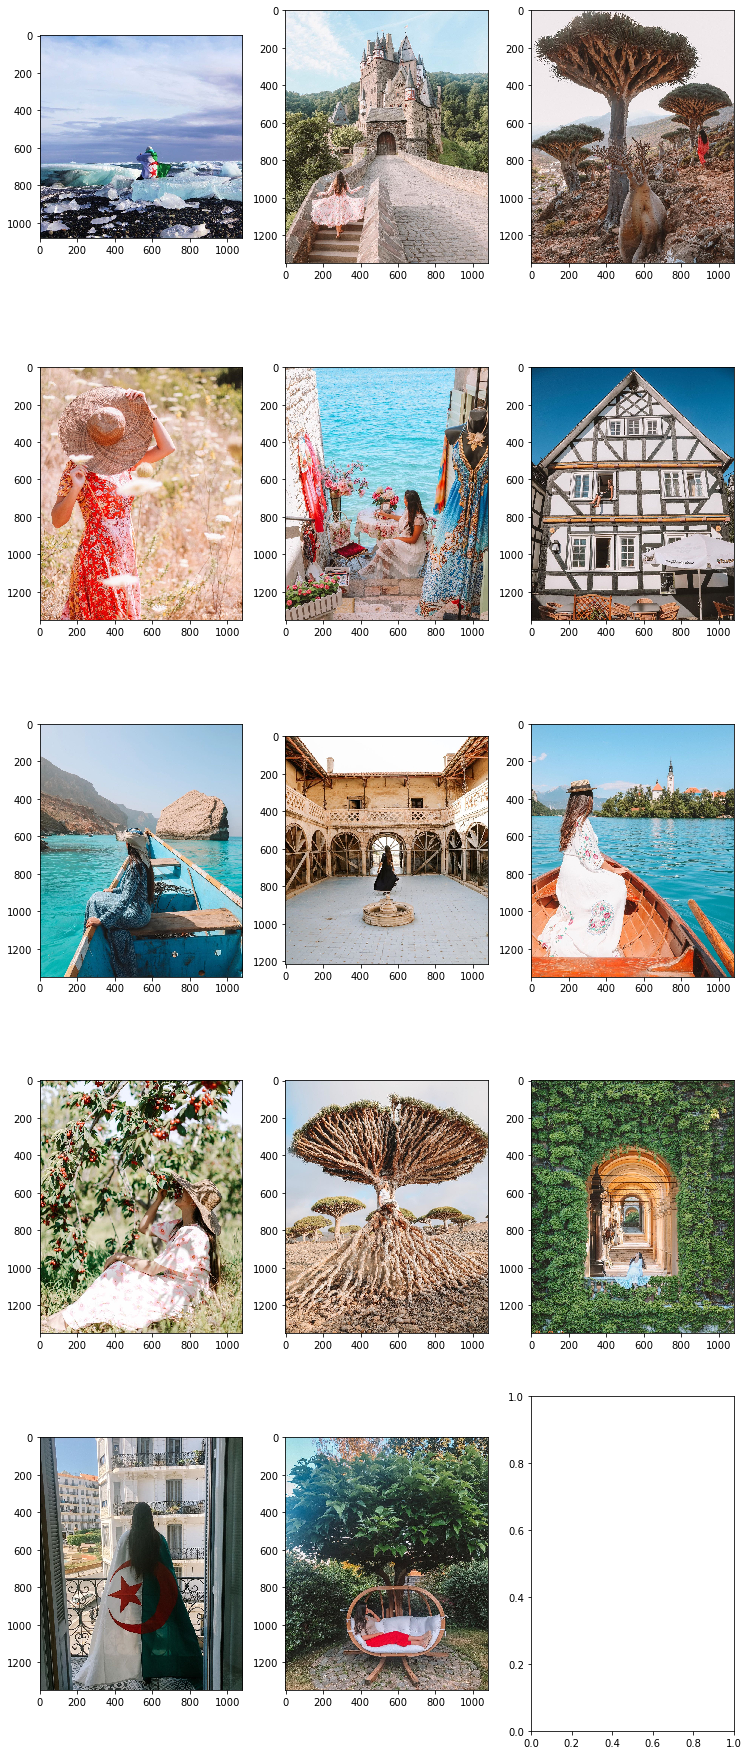

In [4]:
ncol = 3
nrow = len(error_files)//ncol +1
fig_width = ncol*3.5
fig_height = nrow*5

fig, axes = plt.subplots(nrow, ncol, figsize=(fig_width, fig_height))
for idx, file in enumerate(error_files):
    img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)  # open & adjust RGB channels
    
    row_idx = idx//3
    col_idx = idx%3
    axes[row_idx, col_idx].imshow(img)
plt.tight_layout()
plt.show()

## Check files that caused warnings

detected objects of file "2algerianstravel_052_24038Likes.png" : ['person', 'person']


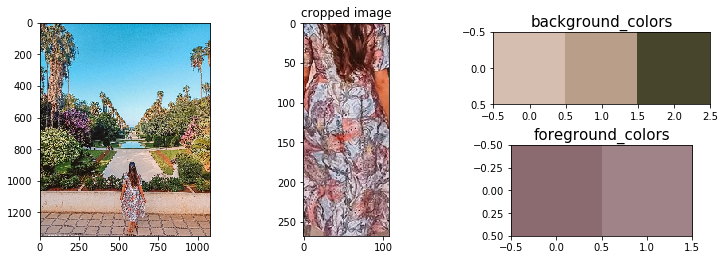

detected objects of file "2algerianstravel_050_16360Likes.png" : ['person', 'person']


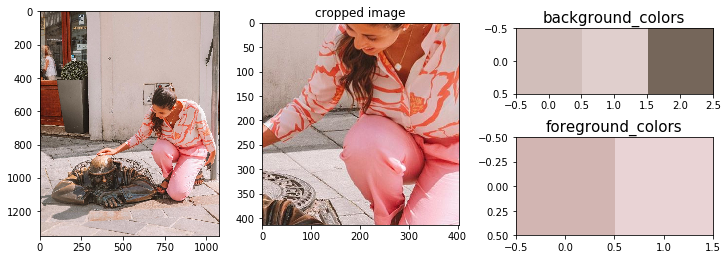

detected objects of file "2algerianstravel_006_17445Likes.png" : ['person', 'person', 'person', 'person', 'person', 'person']


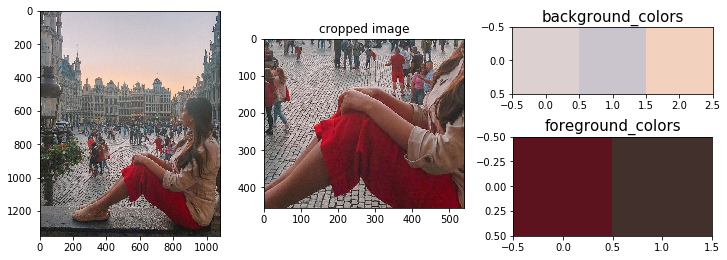

detected objects of file "2algerianstravel_092_25390Likes.png" : ['person', 'person', 'person', 'person', 'person', 'chair', 'person', 'person', 'handbag', 'person', 'person', 'person', 'person', 'handbag', 'umbrella']


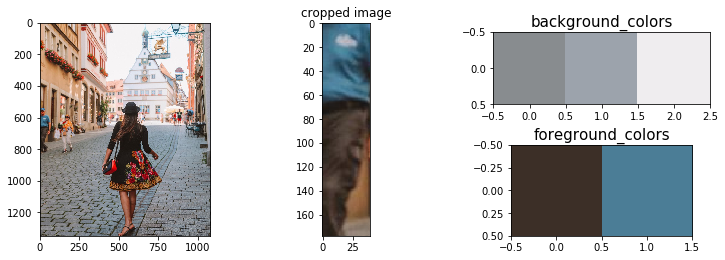

detected objects of file "2algerianstravel_041_18461Likes.png" : ['person', 'person']


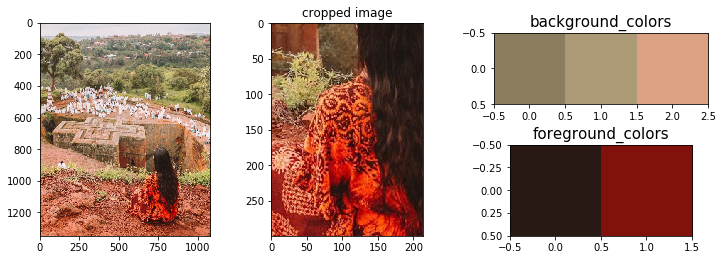

detected objects of file "2algerianstravel_025_16415Likes.png" : ['kite', 'person', 'car', 'car', 'person', 'person', 'person']


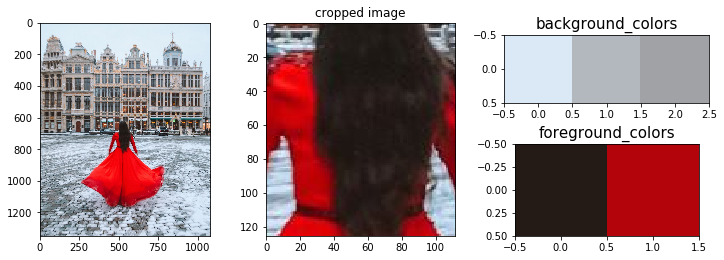

detected objects of file "2algerianstravel_110_16006Likes.png" : ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'bicycle', 'person', 'umbrella']


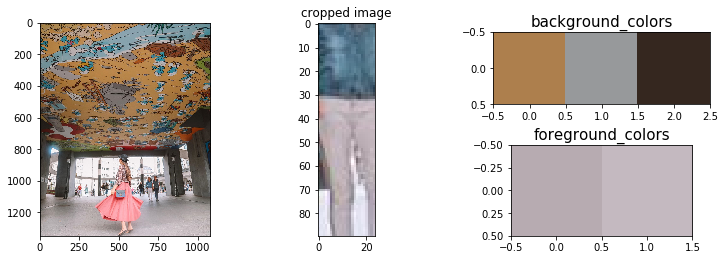

In [5]:
for file in warning_files:
    # get extracted colors from Dataset
    key = file.split('/')[-1]
    back_cols = np.expand_dims(np.array(dataset_dict[key][0]), 0)
    fore_cols = np.expand_dims(np.array(dataset_dict[key][1]), 0)
    
    # load image file
    img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    
    # detect person
    bbox, label, _ = cv.detect_common_objects(img)
    print(f'detected objects of file "{key}" : {label}')
    # crop the first person's area
    idx = label.index('person')
    x, y, x_end, y_end = bbox[idx]
    y_edge = int((y_end - y) * 0.2)
    x_edge = int((x_end - x) * 0.2)
    img_cropped = img[ (y+y_edge):(y_end-y_edge), (x+x_edge):(x_end-x_edge) ]
    
    
    # Visualize the results
    fig_width = 10
    fig_height = 3.5
    fig = plt.figure(constrained_layout=True, figsize=(fig_width, fig_height))
    spec = fig.add_gridspec(2, 3)

    axe1 = fig.add_subplot(spec[:, 0]) # img
    axe1.imshow(img)

    axe2 = fig.add_subplot(spec[:, 1]) # img_cropped
    axe2.imshow(img_cropped)
    axe2.set_title('cropped image')

    axe3 = fig.add_subplot(spec[0, 2]) # background_arr
    axe3.imshow(back_cols)
    axe3.set_title('background_colors', size=15)

    axe4 = fig.add_subplot(spec[1, 2]) # foreground_arr
    axe4.imshow(fore_cols)
    axe4.set_title('foreground_colors', size=15)
    plt.show()